<a href="https://colab.research.google.com/github/MichaelTj02/FinalProject_Group1/blob/main/LicensePlate_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **License Plate Dataset Cleaning**

Source:
https://www.kaggle.com/datasets/francescopettini/license-plate-characters-detection-ocr/

In [16]:
class_labels = [
    "0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
    "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O",
    "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"
]

**Import libraries**

In [17]:
import cv2
import matplotlib.pyplot as plt
import random as random
import os

Dataset path

In [18]:
# Michael local
dataset_path = r"C:\Users\mtj02\Desktop\LicensePlateDataset"

print(os.path.exists(dataset_path))  # Should return True if the path exists

True


In [ ]:
# Ryan local

In [53]:
image_dir = r"C:\Users\mtj02\Desktop\LicensePlateDataset\images"
label_dir = r"C:\Users\mtj02\Desktop\LicensePlateDataset\labels"

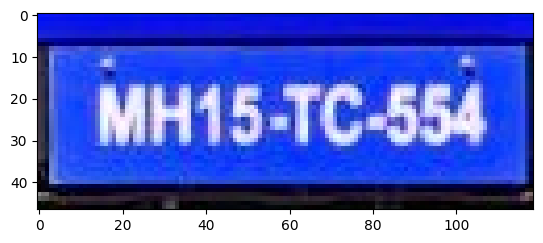

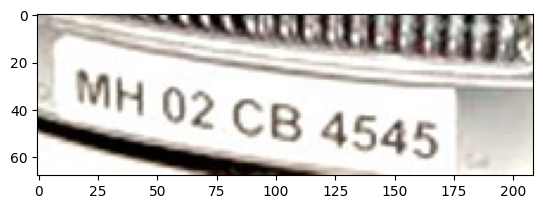

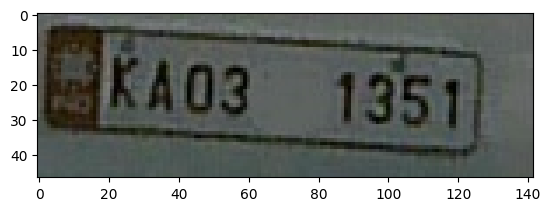

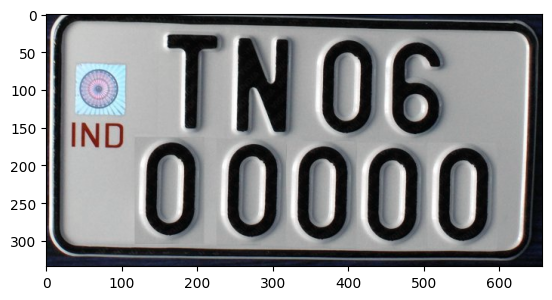

In [54]:
#visualize first four sample images from train data
for idx, image in enumerate(os.listdir(os.path.join(image_dir, "train"))):
    img = cv2.imread(os.path.join(image_dir,"train", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

Change xml to txt

In [55]:
import glob
import xml.etree.ElementTree as ET

df = {'name': [],
      'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}


#This is the way to handle xml format files which are in heirarchial form (trees).

for idx, anno in enumerate(glob.glob(label_dir+"/train" + '/*.xml')):

    trees = ET.parse(anno)

    print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        print(item)

        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width =int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))

        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df['label'] += [label]
                    df['width'] += [width]
                    df['height'] += [height]
                    df['name'] += [anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df['xmin'] += [xmin]

                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df['ymax'] += [ymax]

C:\Users\mtj02\Desktop\LicensePlateDataset\labels/train\0000.xml
<Element 'annotation' at 0x0000021EB4B7E2F0>
<Element 'folder' at 0x0000021EB4B7DA30>
<Element 'filename' at 0x0000021EB4B7DAD0>
<Element 'path' at 0x0000021EB4B7E200>
<Element 'source' at 0x0000021EB4B7DB20>
<Element 'database' at 0x0000021EB4B7DB70>
<Element 'size' at 0x0000021EB4B7DCB0>
<Element 'width' at 0x0000021EB4B7CFE0>
<Element 'height' at 0x0000021EB4B7F0B0>
<Element 'depth' at 0x0000021EB4B7F6A0>
<Element 'segmented' at 0x0000021EB4B7EF70>
<Element 'object' at 0x0000021EB4B7EF20>
<Element 'name' at 0x0000021EB4B7EED0>
<Element 'pose' at 0x0000021EB4B7F060>
<Element 'truncated' at 0x0000021EB4B7F010>
<Element 'difficult' at 0x0000021EB4B7ED40>
<Element 'bndbox' at 0x0000021EB4B7ECF0>
<Element 'xmin' at 0x0000021EB4B7EB60>
<Element 'ymin' at 0x0000021EB4B7EA70>
<Element 'xmax' at 0x0000021EB4B7E7A0>
<Element 'ymax' at 0x0000021EB4B7E750>
<Element 'object' at 0x0000021EB4B7E520>
<Element 'name' at 0x0000021EB4B7E

In [57]:
#import glob
#import xml.etree.ElementTree as ET

df2 = {'name': [],
      'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}


#This is the way to handle xml format files which are in heirarchial form (tees).

for idx, anno in enumerate(glob.glob(label_dir+"/test" + '/*.xml')):

    trees = ET.parse(anno)

    #print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        #print(item)

        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width =int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))

        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df2['label'] += [label]
                    df2['width'] += [width]
                    df2['height'] += [height]
                    #dataset['name']+=[anno.split('/')[-1][0:-4]]
                    df2['name'] += [anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df2['xmin'] += [xmin]

                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df2['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df2['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df2['ymax'] += [ymax]

In [58]:
import pandas as pd
train_df = pd.DataFrame(df)
val_df=pd.DataFrame(df2)
#df1.head()
val_df.head()

,name,label,width,height,xmin,ymin,xmax,ymax
0,test\0190,T,112,31,8,3,17,20
1,test\0190,N,112,31,18,4,26,19
2,test\0190,4,112,31,30,4,38,20
3,test\0190,5,112,31,38,5,46,19
4,test\0190,B,112,31,49,4,57,20


TypeError: Image data of dtype object cannot be converted to float

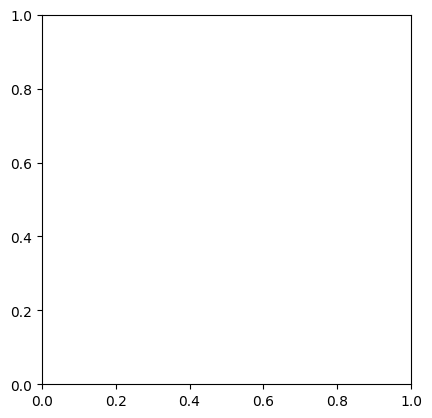

In [59]:
index= 10 #picture to visualize

#import cv2
image = cv2.imread(os.path.join(image_dir,"train", train_df["name"][index]+".jpg"), 1)
# Draw rectangle
cv2.rectangle(image, (train_df['xmin'][index], train_df['ymin'][index]), (train_df['xmax'][index], train_df['ymax'][index]), (255, 0, 0), 2)
# Put label (class_id) near the bbox
label = train_df["label"][index]
cv2.putText(image, str(label), (train_df['xmin'][index], train_df['ymin'][index]+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
# Display image
plt.imshow(image)
plt.axis('off')
plt.show()